In [ ]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import plotly.graph_objects as go
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
import math

In [ ]:
#%%
t, h, g = smp.symbols('t h g', real=True)
the, phi, psi = smp.symbols(r'\theta \phi \psi', cls=smp.Function)
the = the(t)
phi = phi(t)
psi = psi(t)
# Derivatives
the_d = smp.diff(the,t)
phi_d = smp.diff(phi,t)
psi_d = smp.diff(psi,t)
# Second derivatives
the_dd = smp.diff(the_d,t)
phi_dd = smp.diff(phi_d,t)
psi_dd = smp.diff(psi_d,t)


In [ ]:
#%%

uk = 0.28
length = 9
g = 9.8
m = 0.023*length
l = 0.01*length
r = 0.01
mu = 4*np.pi/10**7
h = 0.05

#rotational inertia
Ixx = Iyy = 1/12*m*(3*r**2+l**2)
Izz = 0.5*m*r**2


In [ ]:
#%%
R3 = smp.Matrix([[smp.cos(psi),-smp.sin(psi),0],
                 [smp.sin(psi),smp.cos(psi),0],
                 [0,0,1]])

R2 = smp.Matrix([[1,0,0],
                 [0,smp.cos(the),-smp.sin(the)],
                 [0,smp.sin(the),smp.cos(the)]])

R1 = smp.Matrix([[smp.cos(phi),-smp.sin(phi),0],
                 [smp.sin(phi),smp.cos(phi),0],
                 [0,0,1]])

R = R1*R2*R3
R@smp.Matrix([0,0,-1])


Matrix([
[-sin(\phi(t))*sin(\theta(t))],
[ sin(\theta(t))*cos(\phi(t))],
[             -cos(\theta(t))]])

In [ ]:
omega = smp.Matrix([phi_d*smp.sin(the)*smp.sin(psi)+the_d*smp.cos(psi),
                    phi_d*smp.sin(the)*smp.cos(psi)-the_d*smp.sin(psi),
                    phi_d*smp.cos(the)+psi_d])

I = smp.Matrix([[Ixx,0,0],[0,Iyy,0],[0,0,Izz]])


In [ ]:
#%%
#horizontal distance to the center of mass
distance = -r*smp.cos(the) + r + l/2*smp.sin(the)

#position of the center of mass
z = -r*smp.sin(the)-l/2*smp.cos(the)
x = distance*smp.cos(phi)
y = distance*smp.sin(phi)

#velocities of the center of mass
distance_d = smp.diff(distance,t)
x_d = smp.diff(x,t)
y_d = smp.diff(y,t)
z_d = smp.diff(z,t)
z_dd = smp.diff(z_d,t)


In [ ]:
#%%
translation = 1/2*m*(x_d**2 + y_d**2 + z_d**2)
rotation = smp.Rational(1,2)*omega.T.dot(I*omega).simplify()

#distance_to_charge1 = (r*r*(1-smp.cos(the))**2+(h+r*smp.sin(the))**2)**0.5
#distance_to_charge2 = ((r*(1-smp.cos(the))+l*smp.sin(the))**2+(h+r*smp.sin(the)+l*smp.cos(the))**2)**0.5
V_mag7 = (0.02022*the**5)-(0.11311*the**4)+(0.27582*the**3)-(0.42066*the**2)+(0.46956*the)+0.000235252
V_mag8 = (0.02023*the**5)-(0.11303*the**4)+(0.2757*the**3)-(0.42063*the**2)+(0.47079*the)+0.000233879
V_mag9 = (0.02002*the**5)-(0.11208*the**4)+(0.2743*the**3)-(0.41968*the**2)+(0.4714*the)+0.000248645
V_mag10 = (0.02024*the**5)-(0.11289*the**4)+(0.27547*the**3)-(0.4203*the**2)+(0.47215*the)+0.000234308
V_mag11 = (0.02024*the**5)-(0.11283*the**4)+(0.27537*the**3)-(0.4201*the**2)+(0.47254*the)+0.000237023
V = g*z*m +V_mag9

L = translation + rotation - V
dUdthe = (0.1001*the**4-0.44832*the**3+0.8229*the**2-0.83936*the+0.4714)
V_magforce = (-1/smp.sqrt((r-r*smp.cos(the)+l/2*smp.sin(the))**2+(-r*smp.sin(the)-l/2*smp.cos(the))**2))*dUdthe
FBV = -V_magforce*smp.cos(the)
N = FBV-m*(z_dd+g)
D = uk*N*r
D

-5.796e-6*sin(\theta(t))*Derivative(\theta(t), t)**2 - 2.6082e-5*sin(\theta(t))*Derivative(\theta(t), (t, 2)) - 2.6082e-5*cos(\theta(t))*Derivative(\theta(t), t)**2 + 5.796e-6*cos(\theta(t))*Derivative(\theta(t), (t, 2)) - 0.00568008 + 0.0622222222222222*(0.1001*\theta(t)**4 - 0.44832*\theta(t)**3 + 0.8229*\theta(t)**2 - 0.83936*\theta(t) + 0.4714)*cos(\theta(t))/sqrt((-0.222222222222222*sin(\theta(t)) - cos(\theta(t)))**2 + (sin(\theta(t)) - 0.222222222222222*cos(\theta(t)) + 0.222222222222222)**2)

<function matplotlib.pyplot.show(close=None, block=None)>

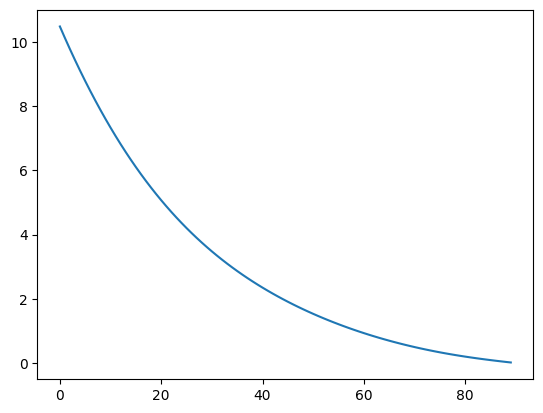

In [ ]:
#%%
x_data = []
y_data = []
for n in range(0,90):
  x = np.radians(n)
  FB = (-1/math.sqrt((r-r*math.cos(x)+l/2*math.sin(x))**2+(-r*math.sin(x)-l/2*math.cos(x))**2))*(0.1001*x**4-0.44832*x**3+0.8229*x**2-0.83936*x+0.4714)*-math.cos(x)
  x_data.append(n)
  y_data.append(FB)
plt.plot(x_data, y_data)
plt.show


In [ ]:
#%%
#Position of the contact point
contact = smp.Matrix([r*smp.cos(the),r*smp.sin(the), 0])
COM = smp.Matrix([x,y,z])
relative_distance = contact - COM

#determining vlocity relative to the center of mass
rel_velocity_of_contact = omega.cross(relative_distance)
#velocity_of_contact[0]
#velocity_of_contact[1]


In [ ]:
#%%
#velocity vector of center of mass
COM_v = smp.Matrix([x_d,y_d,z_d])
absolute_velocity = COM_v + rel_velocity_of_contact
absolute_velocity[2]

constraint_1 = absolute_velocity[0]
constraint_2 = absolute_velocity[1]
#constraint_3 is trivial since we defined the position of the COM with the contact point
#constraint_3 = absolute_velocity[2]
constraint_1 = constraint_1.simplify()
constraint_2 = constraint_2.simplify()
#constraint_3 = constraint_3.simplify()


In [ ]:
#%%

LE1 = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t)
LE1 = LE1.simplify()

LE2 = smp.diff(L, phi) - smp.diff(smp.diff(L, phi_d), t)
LE2 = LE2-uk*0.3*r
#LE2 = LE2-D
LE2 = LE2.simplify()

LE3 = smp.diff(L, psi) - smp.diff(smp.diff(L, psi_d), t)
LE3 = LE3.simplify()


In [ ]:
#%%
sols = smp.solve([LE1, LE2, LE3, constraint_1, constraint_2], (the_dd, phi_dd, psi_dd),
                simplify=False, rational=False)


In [ ]:
#%%
dz1dt_f = smp.lambdify((the, phi, psi, the_d, phi_d, psi_d), sols[the_dd])
dthedt_f = smp.lambdify(the_d, the_d)

dz2dt_f = smp.lambdify((the, phi, psi, the_d, phi_d, psi_d), sols[phi_dd])
dphidt_f = smp.lambdify(phi_d, phi_d)

dz3dt_f = smp.lambdify((the, phi, psi, the_d, phi_d, psi_d), sols[psi_dd])
dpsidt_f = smp.lambdify(psi_d, psi_d)


In [ ]:
#%%
def dSdt(S, t):
    the, phi, psi, z1, z2, z3 = S
    return [
        dthedt_f(z1),
        dphidt_f(z2),
        dpsidt_f(z2),
        dz1dt_f(the,phi,psi,z1,z2,z3),
        dz2dt_f(the,phi,psi,z1,z2,z3),
        dz3dt_f(the,phi,psi,z1,z2,z3),
    ]

In [ ]:
#%%
time = 30
dt = 0.01
t = np.linspace(0, time, int(time/dt))
ans1 = odeint(dSdt, y0 = [1.57, 0, 0, 0, 28.1, 15], t = t)


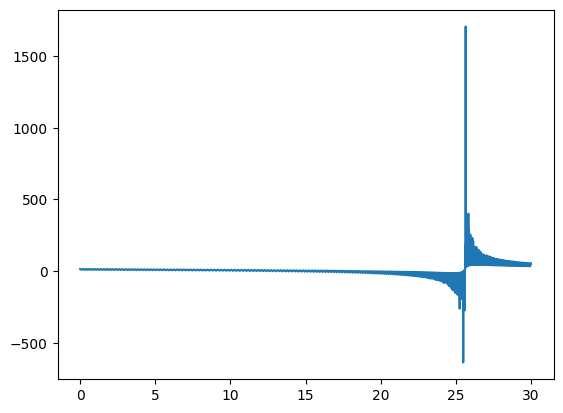

In [ ]:
#%%
the = ans1.T[0]
phi = ans1.T[1]
psi = ans1.T[2]
the_d = ans1.T[3]
phi_d = ans1.T[4]
psi_d = ans1.T[5]
plt.plot(t,psi_d)
plt.show()

In [ ]:
#輸出某個時間點的各項參數(用於繪製動畫)
path = r"Numerical Solution.txt"
with open (path,'w') as f:
  f.write(str([r,l,h,1/dt])+"\n")
  for n in range(0,int(time/dt)-1):
    distance = -r*smp.cos(the[n]) + r + l/2*smp.sin(the[n])
    x = distance*smp.cos(phi[n])
    y = distance*smp.sin(phi[n])
    z = -r*smp.sin(the[n])-l/2*smp.cos(the[n])
    f.write(str([n/dt,x,y,z,the[n],phi[n],psi_d[n],the_d[n],phi_d[n],psi_d[n]])+"\n")
f.close()

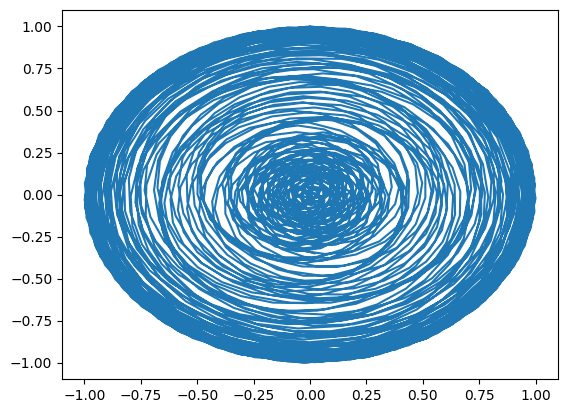

In [ ]:
#%%
def get_pos(t, the_t, phi_t):
    return (np.sin(phi_t)*np.sin(the_t),
           np.cos(phi_t)*np.sin(the_t),
           np.cos(the_t))

x, y, z = get_pos(t, ans1.T[0], ans1.T[1])
plt.plot(x,y)

In [ ]:
#%%
data = []
for n in the:
  if n <0.0001:
    break
  data.append(n)